# Upload the zip file datas

In [1]:
from google.colab import files

# Prompt the user to upload the zip file
uploaded = files.upload()

Saving data.zip to data.zip


# Unzip the Uploaded Zip File

In [2]:
import zipfile

# Specify the path to your zip file
zip_file_path = "/content/data.zip"

# Specify the directory where you want to extract the contents
extraction_path = "/content/"

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Importing the libraries


In [3]:
import tensorflow as tf
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


# Remove dodgy images

In [4]:
data_dir = 'data'

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
data_dir = "/content/data/"
image_exts = {'jpeg', 'jpg', 'png', 'gif'}

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = Image.open(image_path)
            tip = img.format.lower()
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Issue with image /content/data/dog/vector9.svg
Issue with image /content/data/dog/vector5.svg
Issue with image /content/data/dog/vector13.svg
Image not in ext list /content/data/dog/Blind-dogs-nora-3-1536x0-c-default.webp
Image not in ext list /content/data/dog/dogs-gate-575023.jpg.webp
Issue with image /content/data/dog/vector6.svg
Issue with image /content/data/dog/vector3.svg
Image not in ext list /content/data/dog/rs_stationary__two-dogs-sitting-in-flowers_-labrador_fergusthelab_-1024x769.webp
Issue with image /content/data/dog/vector10.svg
Issue with image /content/data/dog/vector8.svg
Issue with image /content/data/dog/vector4.svg
Issue with image /content/data/dog/vector7.svg
Issue with image /content/data/dog/vector11.svg
Image not in ext list /content/data/dog/dog-tethered-441107.jpg.webp
Issue with image /content/data/dog/vector14.svg
Issue with image /content/data/dog/vector.svg
Issue with image /content/data/dog/vector2.svg
Image not in ext list /content/data/dog/Best-dog-b

# Load Data

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1986 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

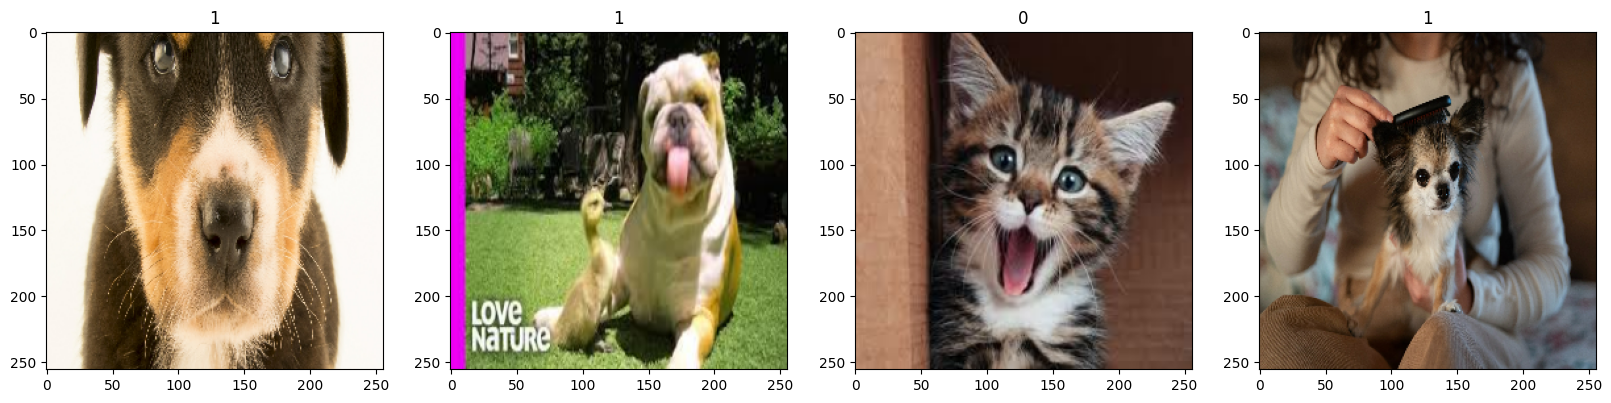

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[0.00000000e+00, 2.00214460e-02, 0.00000000e+00],
          [0.00000000e+00, 3.30269597e-02, 0.00000000e+00],
          [0.00000000e+00, 5.05055152e-02, 0.00000000e+00],
          ...,
          [0.00000000e+00, 2.42187493e-02, 0.00000000e+00],
          [0.00000000e+00, 2.00214460e-02, 0.00000000e+00],
          [7.56740198e-03, 1.58241428e-02, 0.00000000e+00]],
 
         [[0.00000000e+00, 2.67432127e-02, 0.00000000e+00],
          [2.39114204e-04, 3.75612751e-02, 0.00000000e+00],
          [2.26715696e-03, 5.46413064e-02, 0.00000000e+00],
          ...,
          [0.00000000e+00, 2.19515935e-02, 0.00000000e+00],
          [0.00000000e+00, 1.97823327e-02, 0.00000000e+00],
          [7.56740198e-03, 1.58241428e-02, 0.00000000e+00]],
 
         [[4.61593317e-03, 3.63051482e-02, 0.00000000e+00],
          [3.78346164e-03, 4.52813841e-02, 0.00000000e+00],
          [6.04535267e-03, 5.97830974e-02, 0.00000000e+00],
          ...,
          [0.00000000e+00, 1.93376131e-02, 0.0000

# Split Data

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
train_size

44

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model

In [16]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [21]:
logdir='logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5578 - loss: 0.8464 - val_accuracy: 0.4974 - val_loss: 0.6792
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.5525 - loss: 0.6734 - val_accuracy: 0.6224 - val_loss: 0.6545
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6514 - loss: 0.6294 - val_accuracy: 0.5938 - val_loss: 0.6467
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6896 - loss: 0.6021 - val_accuracy: 0.6276 - val_loss: 0.6356
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7349 - loss: 0.5546 - val_accuracy: 0.6953 - val_loss: 0.6033
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.7709 - loss: 0.4858 - val_accuracy: 0.6458 - val_loss: 0.6362
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.8390 - loss: 0.3743 - val_accuracy: 0.6589 - val_loss: 0.6081
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.8139 - loss: 0.3990 - val_accuracy: 0.7708 - val_los

# Plot Performance

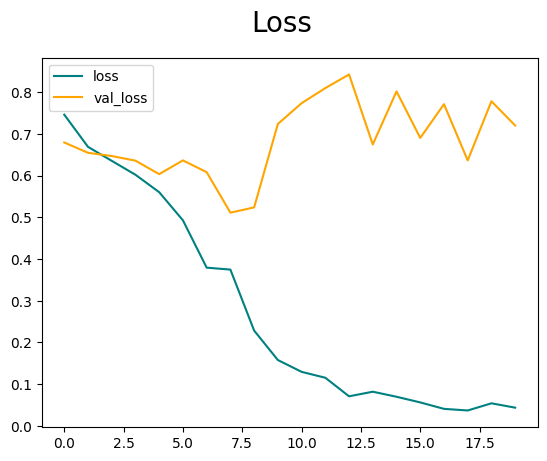

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

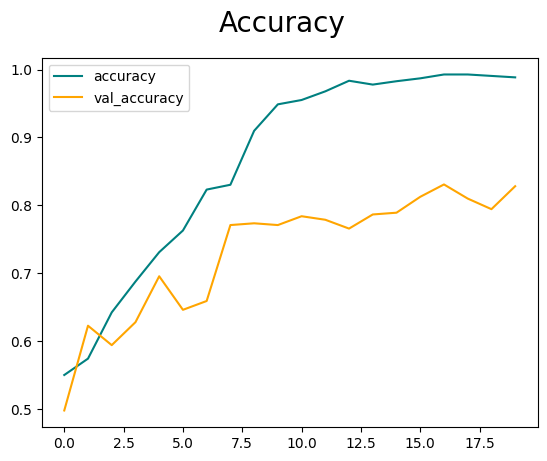

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [26]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [27]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [28]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


In [29]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.76, shape=(), dtype=float32) tf.Tensor(0.7378641, shape=(), dtype=float32) tf.Tensor(0.734375, shape=(), dtype=float32)


# Test

In [30]:
import cv2

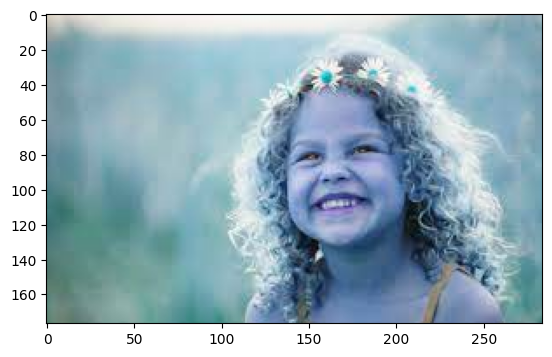

In [53]:
img = cv2.imread('happydata.jpeg')
plt.imshow(img)
plt.show()

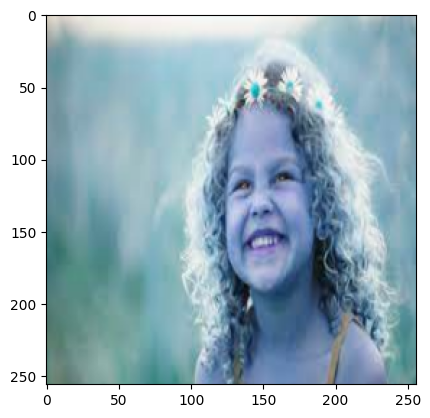

In [54]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [55]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [56]:
yhat

array([[0.15384468]], dtype=float32)

In [57]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
